In [1]:
import numpy as np
import os
import tensorflow as tf
import cv2
import json
import matplotlib.pyplot as plt

print("Hello world.")

2025-12-05 13:15:17.221284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764940517.468016      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764940517.541926      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Hello world.


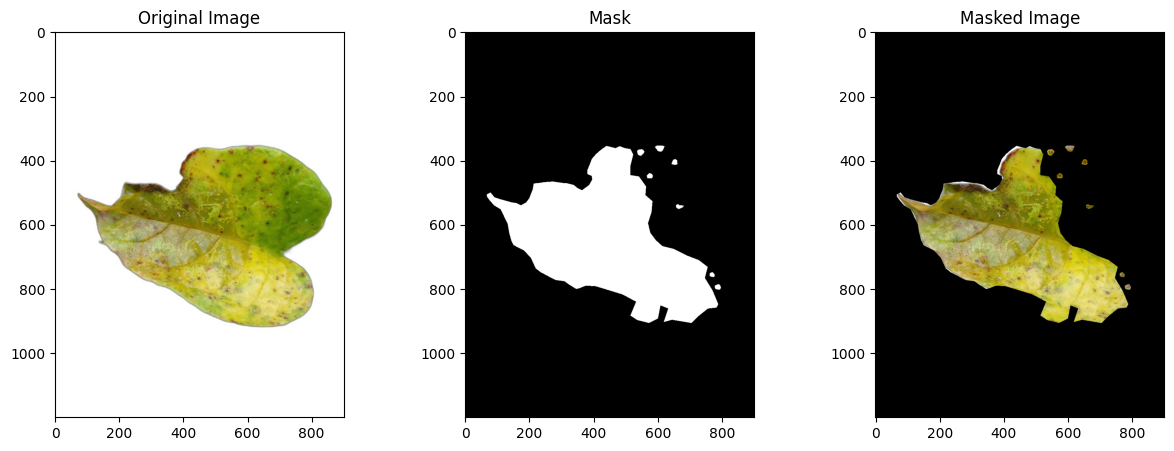

In [2]:


image_path = r"/kaggle/input/malabar-dataset/Malabar_Dataset/Downy-Mildew(240)/Downy-Mildew (100).jpg"
image = cv2.imread(image_path)

json_path = r"/kaggle/input/temp-downy-mildew-dataset-151/Downy-Mildew(240)/affected_region/Downy-Mildew (100).json"
with open(json_path, 'r') as file:
    data = json.load(file)

# Create a blank mask with the same dimensions as the input image
mask = np.zeros(image.shape[:2], dtype=np.uint8)

if 'shapes' in data:
    for annotation in data['shapes']:
        points = np.array(annotation['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], color=255)
elif 'annotations' in data:
    for annotation in data['annotations']:
        points = np.array(annotation['points'], dtype=np.int32)
        cv2.fillPoly(mask, [points], color=255)
else:
    print("No valid keys ('shapes' or 'annotations') found in JSON.")

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Display the original image, mask, and masked image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Mask")
plt.imshow(mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Masked Image")
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

plt.show()

100


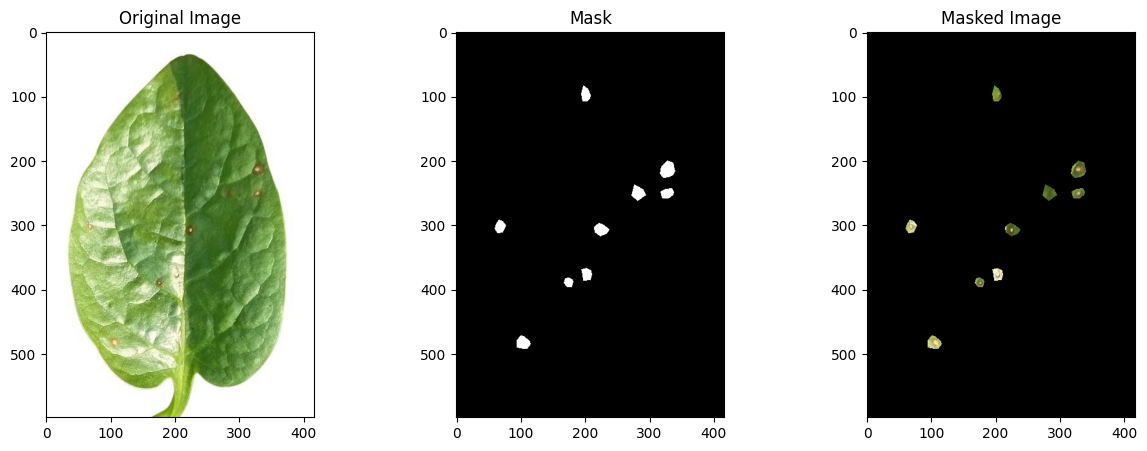

101


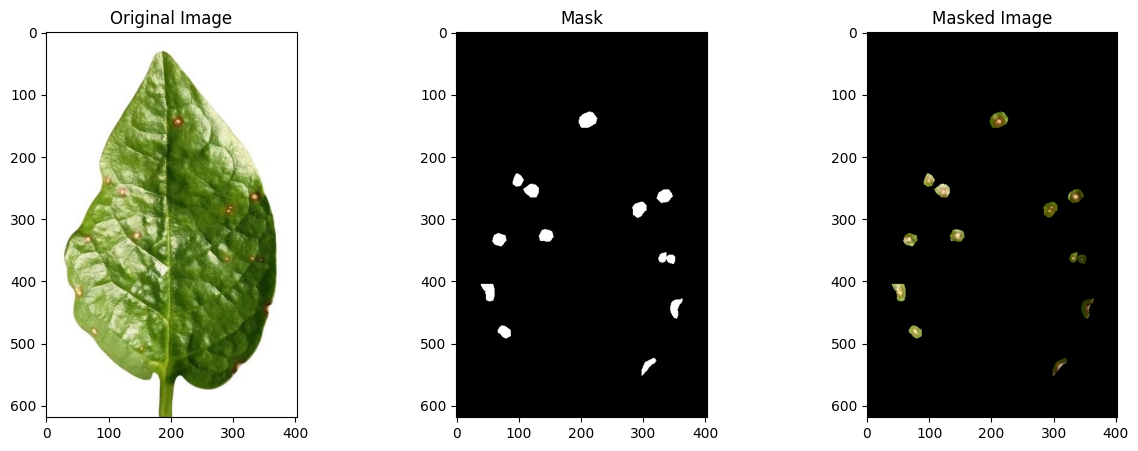

102


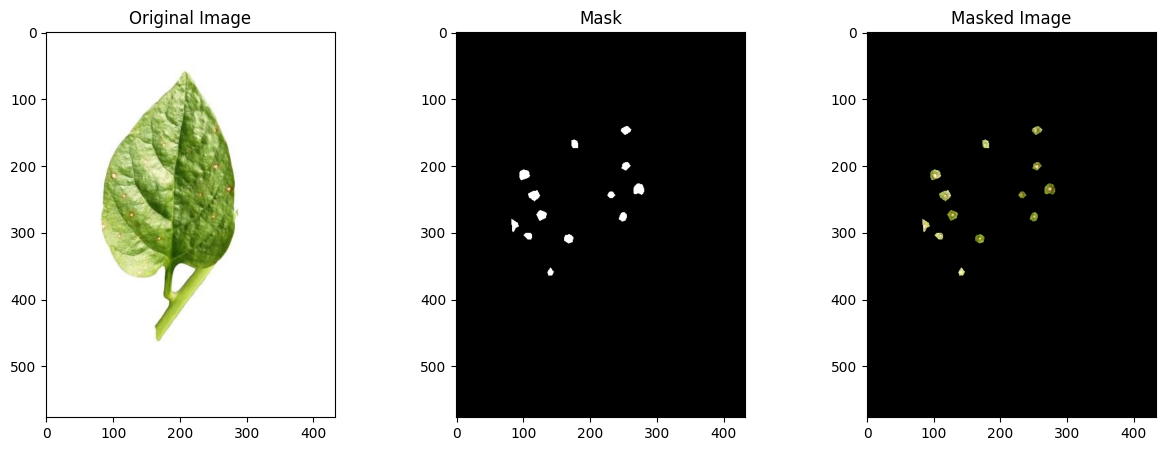

103


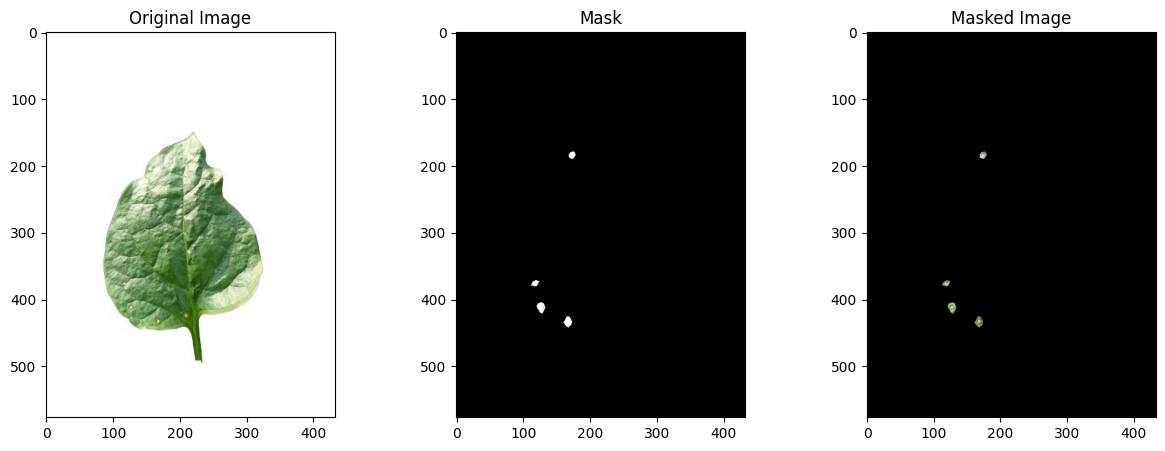

104


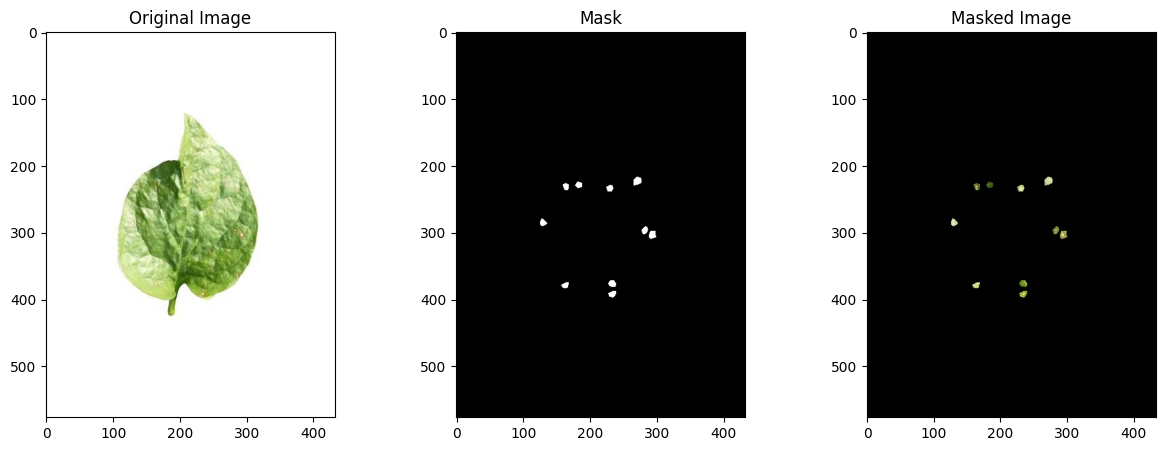

In [3]:
i = 0 
image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset/Bacterial-Spot(752)"
json_path = "/kaggle/input/affected-region-json-files/annotated_json_files/Bacterial-Spot(752)/affected_region/Bacterial-Spot(752)"
for i in range(100, 105):
    print(i)
    image_name = "Bacterial-Spot ("+str(i+1)+").jpg"
    json_file_name = "Bacterial-Spot ("+str(i+1)+").json"
    #print(image_name)
    #print(json_file_name)
    image = cv2.imread(image_path+'/'+image_name)
    json_file = json_path + '/' + json_file_name
    #print(json_file)

    with open(json_file, 'r') as file:
        data = json.load(file)

    # Create a blank mask with the same dimensions as the input image
    mask = np.zeros(image.shape[:2], dtype=np.uint8)

    if 'shapes' in data:
        for annotation in data['shapes']:
            points = np.array(annotation['points'], dtype=np.int32)
            cv2.fillPoly(mask, [points], color=255)
    elif 'annotations' in data:
        for annotation in data['annotations']:
            points = np.array(annotation['points'], dtype=np.int32)
            cv2.fillPoly(mask, [points], color=255)
    else:
        print("No valid keys ('shapes' or 'annotations') found in JSON.")

    masked_image = cv2.bitwise_and(image, image, mask=mask)


    # Display the original image, mask, and masked image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 3, 2)
    plt.title("Mask")
    plt.imshow(mask, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Masked Image")
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))

    plt.show()




In [4]:
import os
import json
import numpy as np
import cv2

def create_mask(json_file, image_shape):
    if json_file is None or not os.path.exists(json_file):
        return None
    try:
        with open(json_file, 'r') as f:
            data = json.load(f)
    except:
        return None
    if 'shapes' not in data or data['shapes'] is None:
        return None

    mask = np.zeros(image_shape[:2], dtype=np.uint8)

    try:
        for shape in data['shapes']:
            points = np.array(shape.get('points', []), dtype=np.int32)
            if len(points) > 2:
                cv2.fillPoly(mask, [points], 255)
    except:
        return None

    return mask


def find_image_file(base_name, image_path):
    """Find the correct image file (.jpg, .JPG, .jpeg, .JPEG, .png)"""
    exts = [".jpg", ".JPG", ".jpeg", ".JPEG", ".png"]
    for ext in exts:
        file_path = os.path.join(image_path, base_name + ext)
        if os.path.exists(file_path):
            return file_path
    return None

print("Hello world")

Hello world


In [5]:



train_images, valid_images, test_images, test_images_a, test_images_b  = [], [], [], [], []
train_masks, valid_masks, test_masks, test_masks_a, test_masks_b = [], [] , [], [], []


image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset/Anthracnose(102)"
json_path = "/kaggle/input/affected-region-json-files/annotated_json_files/Anthracnose(102)/affected_region"


for i in range(0, len(os.listdir(image_path))):

    base_name = f"Anthracnose ({i+1})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if i < 80:
        train_images.append(image)
        train_masks.append(mask)
    elif i < 90:
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_a.append(image)
        test_masks_a.append(mask)

print("Done.")


Done.


In [6]:
image_path = "/kaggle/input/malabar-dataset/Malabar_Dataset/Bacterial-Spot(752)"
json_path = "/kaggle/input/affected-region-json-files/annotated_json_files/Bacterial-Spot(752)/affected_region/Bacterial-Spot(752)"


for i in range(0, len(os.listdir(image_path))):

    base_name = f"Bacterial-Spot ({i+1})"

    json_file = os.path.join(json_path, base_name + ".json")

    # --- FIND REAL IMAGE FILE ---
    image_file = find_image_file(base_name, image_path)
    if image_file is None:
        print(f"Image missing: {base_name}")
        continue

    image = cv2.imread(image_file)
    if image is None:
        print(f"Failed to read: {image_file}")
        continue

    mask = create_mask(json_file, image.shape)
    if mask is None:
        print(f"Mask skipped: {json_file}")
        continue

    if i < 650:
        train_images.append(image)
        train_masks.append(mask)
    elif i < 700:
        valid_images.append(image)
        valid_masks.append(mask)
    else:
        test_images.append(image)
        test_masks.append(mask)
        test_images_b.append(image)
        test_masks_b.append(mask)

print("Done.")


Mask skipped: /kaggle/input/affected-region-json-files/annotated_json_files/Bacterial-Spot(752)/affected_region/Bacterial-Spot(752)/Bacterial-Spot (86).json
Mask skipped: /kaggle/input/affected-region-json-files/annotated_json_files/Bacterial-Spot(752)/affected_region/Bacterial-Spot(752)/Bacterial-Spot (91).json
Done.


In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, concatenate

def build_unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    
    u4 = UpSampling2D((2, 2))(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(u4)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    
    u5 = UpSampling2D((2, 2))(c4)
    u5 = concatenate([u5, c1])
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(u5)
    c5 = Conv2D(64, (3, 3), activation='relu', padding='same')(c5)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)
    
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

unet_model = build_unet()
unet_model.summary()

I0000 00:00:1764940591.356132      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764940591.356840      38 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 128, 128,  │          0 │ conv2d_5[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128, 128,  │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 384)              │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 128,  │    442,496 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 256, 256,  │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 256, 256,  │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 192)              │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 256, 256,  │    110,656 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d_8[0][0]  

 Total params: 1,883,137 (7.18 MB)

 Trainable params: 1,883,137 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Preprocess images and masks
image_size = (256, 256)

def preprocess_data(images, masks):
    images_resized = [cv2.resize(img, image_size) for img in images]
    masks_resized = [cv2.resize(mask, image_size) for mask in masks]
    
    images_array = np.array(images_resized) / 255.0
    masks_array = np.array(masks_resized) / 255.0
    
    images_array = images_array.astype(np.float32)
    masks_array = masks_array.astype(np.float32)
    
    masks_array = np.expand_dims(masks_array, axis=-1)  # Ensure correct shape
    
    return images_array, masks_array

# Prepare datasets
X_train, y_train = preprocess_data(train_images, train_masks)
X_valid, y_valid = preprocess_data(valid_images, valid_masks)
X_test, y_test = preprocess_data(test_images, test_masks)
#X_test_a, y_test_a = preprocess_data(test_images_a, test_masks_a)
#X_test_b, y_test_b = preprocess_data(test_images_b, test_masks_b)

# Callbacks
checkpoint = ModelCheckpoint("unet_best_model.keras", monitor="val_loss", save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=40, restore_best_weights=True)

# Train the model
history = unet_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    batch_size=8,
    callbacks=[checkpoint, early_stopping]
)

# Evaluate on test set
test_loss, test_accuracy = unet_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1/50


I0000 00:00:1764940600.485738     108 service.cc:148] XLA service 0x7e459c009270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764940600.486803     108 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764940600.486826     108 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764940601.061466     108 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1764940626.481743     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.9908 - loss: 0.1139
Epoch 1: val_loss improved from inf to 0.01903, saving model to unet_best_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 68s 411ms/step - accuracy: 0.9908 - loss: 0.1133 - val_accuracy: 0.9958 - val_loss: 0.0190
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.9902 - loss: 0.0356
Epoch 2: val_loss improved from 0.01903 to 0.01650, saving model to unet_best_model.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 25s 270ms/step - accuracy: 0.9902 - loss: 0.0356 - val_accuracy: 0.9958 - val_loss: 0.0165
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9911 - loss: 0.0297
Epoch 3: val_loss did not improve from 0.01650
91/91 ━━━━━━━━━━━━━━━━━━━━ 25s 280ms/step - accuracy: 0.9911 - loss: 0.0297 - val_accuracy: 0.9959 - val_loss: 0.0167
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.9905 - loss: 0.0329
Epoch 4: val_loss did not improve from 0.01650
91/91 ━━━━━━━━━━━━━━━━━━━━ 27s 293ms/step -

2025-12-05 13:39:11.798889: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng11{k2=1,k3=0} for conv (f32[32,64,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,192,256,256]{3,2,1,0}, f32[64,192,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-12-05 13:39:12.017919: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.219139591s
Trying algorithm eng11{k2=1,k3=0} for conv (f32[32,64,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,192,256,256]{3,2,1,0}, f32[64,192,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivat

2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 386ms/step - accuracy: 0.9925 - loss: 0.0248
Test Loss: 0.0214, Test Accuracy: 0.9934


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step


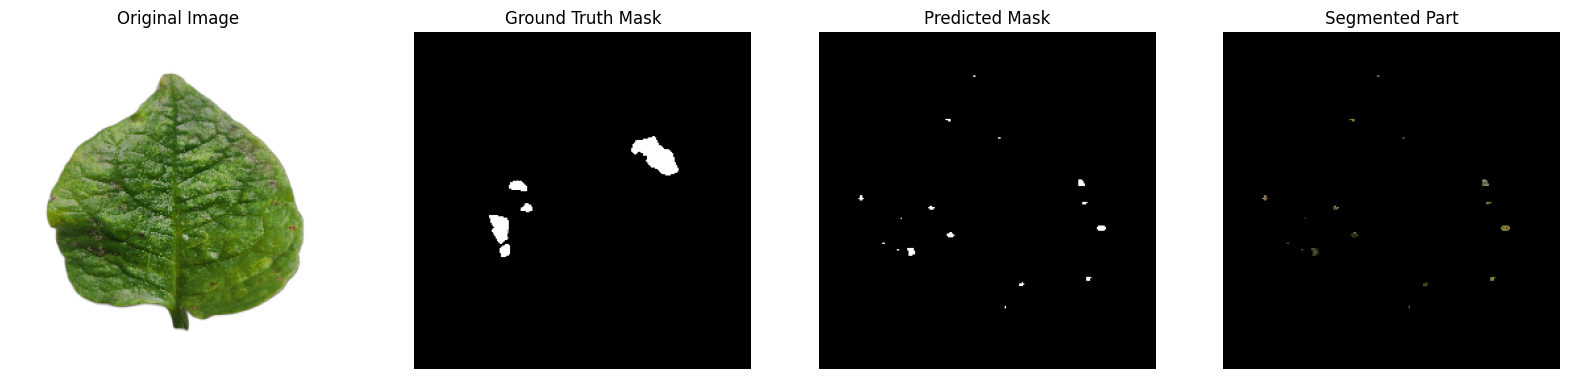

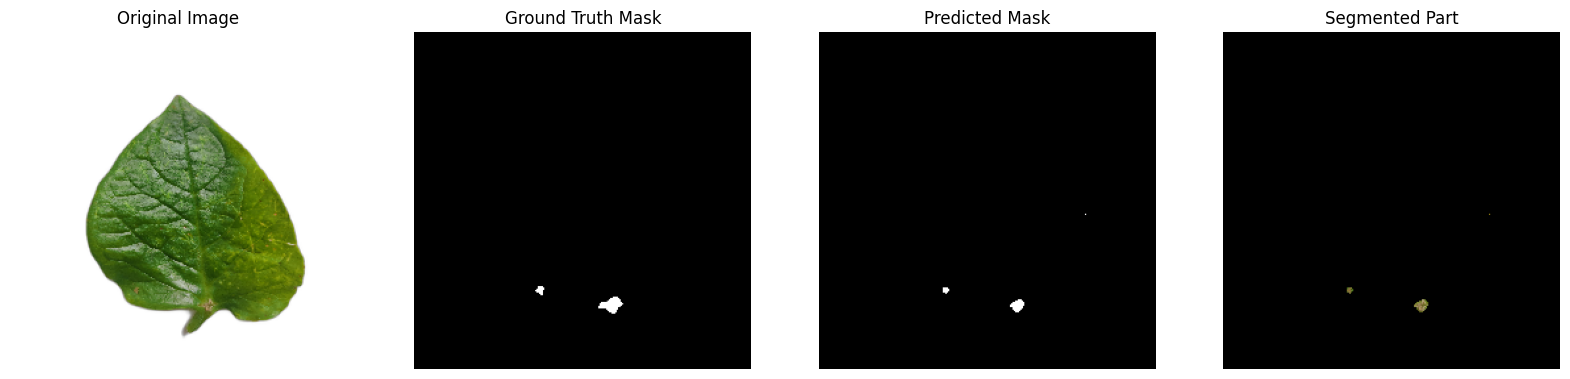

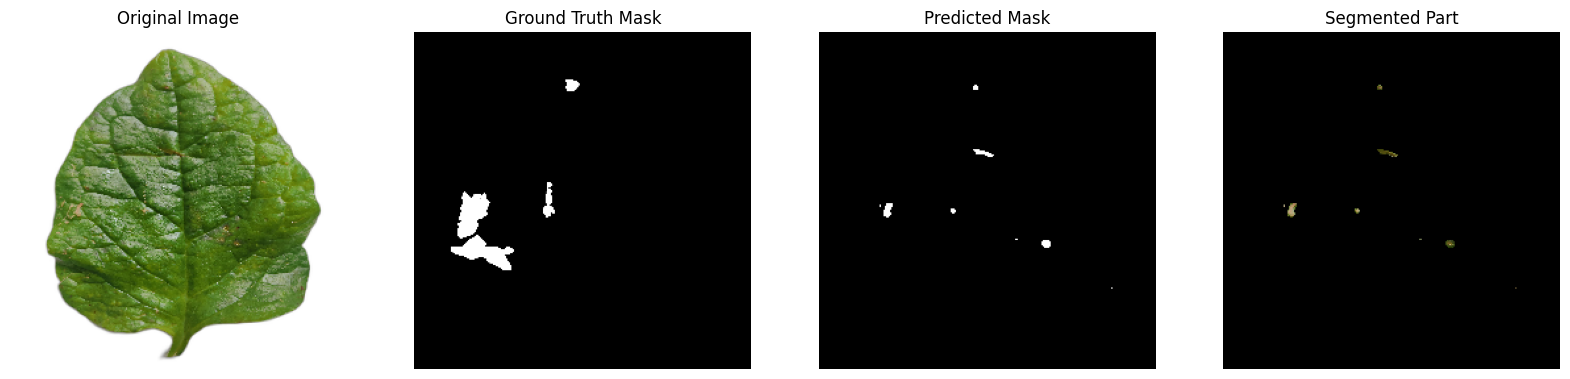

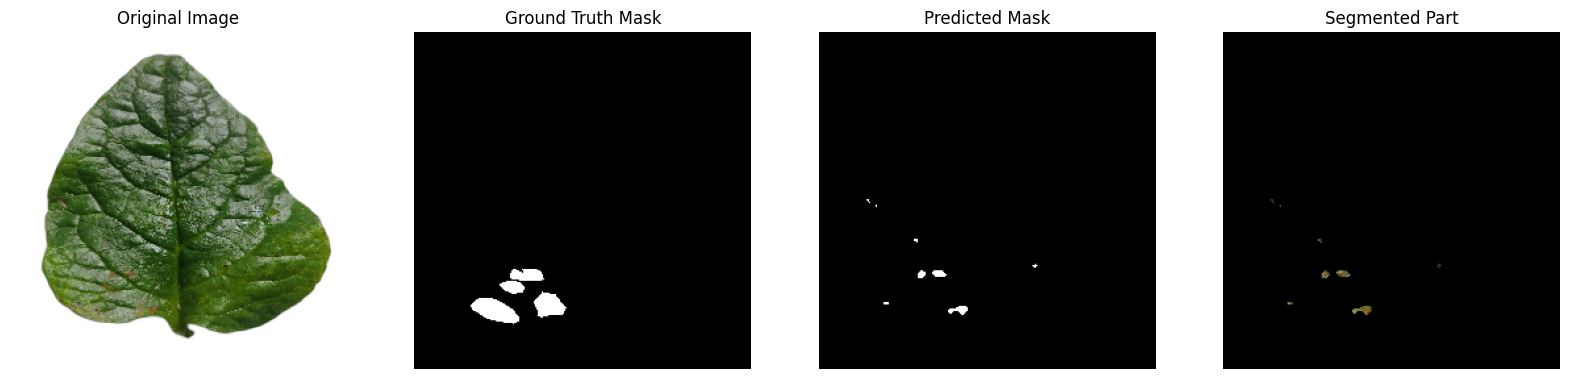

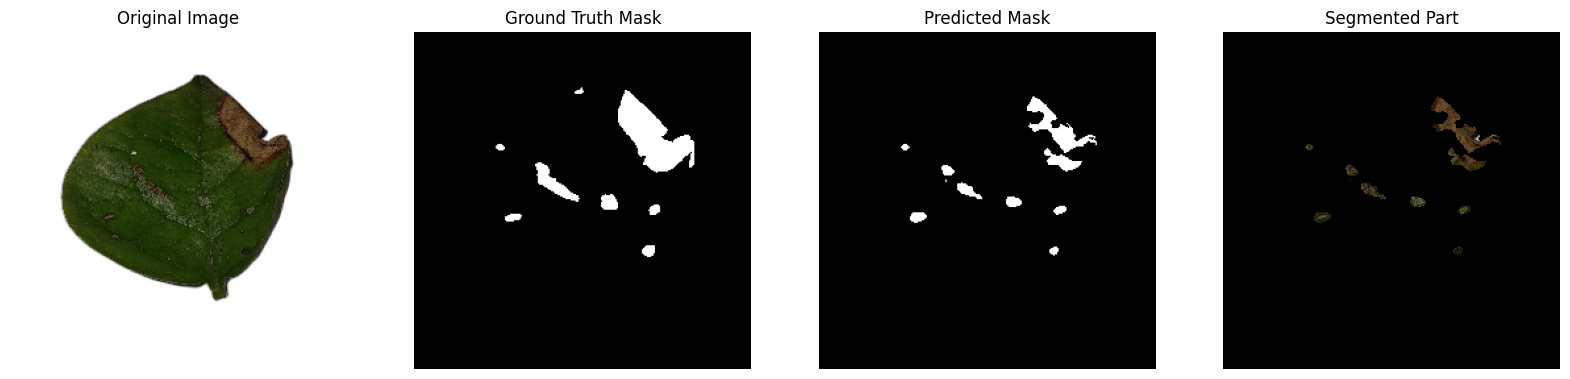

In [9]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

# Prediction and Mask Creation
def create_mask(predictions):
    # Convert predictions to binary mask
    predictions = (predictions > 0.5).astype(np.uint8)
    return predictions

# Load model and predict
best_model = load_model("/kaggle/working/unet_best_model.keras")
predictions = best_model.predict(X_test)

# Create masks from predictions
predicted_masks = create_mask(predictions)

def get_segmented_image(image, mask):
    # Ensure both are uint8 and mask is single channel
    image_uint8 = (image * 255).astype(np.uint8) if image.dtype != np.uint8 else image
    mask_uint8 = (mask.squeeze() * 255).astype(np.uint8)
    
    # Ensure mask is 2D
    if mask_uint8.ndim == 3:
        mask_uint8 = mask_uint8[..., 0]

    # Apply mask using bitwise_and
    segmented = cv2.bitwise_and(image_uint8, image_uint8, mask=mask_uint8)
    return segmented

def visualize_results(images, masks, predictions, num_images=5):
    for i in range(0, num_images):
        img = images[i]
        true_mask = masks[i]
        predicted_mask = predictions[i]
        segmented_img = get_segmented_image(img, predicted_mask)

        plt.figure(figsize=(20, 5))  # wider figure for 4 plots

        # 1. Original Image
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # 2. Ground Truth Mask
        plt.subplot(1, 4, 2)
        plt.imshow(true_mask.squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        # 3. Predicted Mask
        plt.subplot(1, 4, 3)
        plt.imshow(predicted_mask.squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

        # 4. Segmented Part
        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
        plt.title('Segmented Part')
        plt.axis('off')

        plt.show()

# Visualize results
visualize_results(X_test, y_test, predicted_masks, num_images=5)



# Save predicted masks and segmented images
def save_masks_and_segmented(images, masks, output_dir):
    masks_dir = os.path.join(output_dir, "predicted_masks")
    segmented_dir = os.path.join(output_dir, "segmented_images")
    
    os.makedirs(masks_dir, exist_ok=True)
    os.makedirs(segmented_dir, exist_ok=True)
    
    for i, (img, mask) in enumerate(zip(images, masks)):
        # Convert to proper format
        img_uint8 = (img * 255).astype(np.uint8) if img.dtype != np.uint8 else img
        mask_uint8 = (mask.squeeze() * 255).astype(np.uint8)
        
        # Save predicted mask
        mask_path = os.path.join(masks_dir, f"pred_mask_{i}.png")
        cv2.imwrite(mask_path, mask_uint8)
        
        # Create segmented image
        segmented_img = get_segmented_image(img_uint8, mask)
        
        # Ensure color format before saving
        segmented_bgr = segmented_img
        #segmented_bgr = cv2.cvtColor(segmented_img , cv2.COLOR_RGB2BGR)
        segmented_path = os.path.join(segmented_dir, f"segmented_{i}.png")
        cv2.imwrite(segmented_path, segmented_bgr)


save_masks_and_segmented(X_test, predicted_masks, output_dir="/kaggle/working/output")

In [10]:
def visualize_results(images, masks, predictions, num_images=5):
    for i in range(0, num_images):
        img = images[i]
        true_mask = masks[i]
        predicted_mask = predictions[i]
        segmented_img = get_segmented_image(img, predicted_mask)

        plt.figure(figsize=(20, 5))  # wider figure for 4 plots

        # 1. Original Image
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # 2. Ground Truth Mask
        plt.subplot(1, 4, 2)
        plt.imshow(true_mask.squeeze(), cmap='gray')
        plt.title('Ground Truth Mask')
        plt.axis('off')

        # 3. Predicted Mask
        plt.subplot(1, 4, 3)
        plt.imshow(predicted_mask.squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

        # 4. Segmented Part
        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
        plt.title('Segmented Part')
        plt.axis('off')

        plt.show()

# Visualize results
#visualize_results(X_test_b, y_test_b, predicted_masks, num_images=5)

Mean IoU: 0.3741
Mean Dice Coefficient: 0.5225
Mean Pixel Accuracy: 0.9937


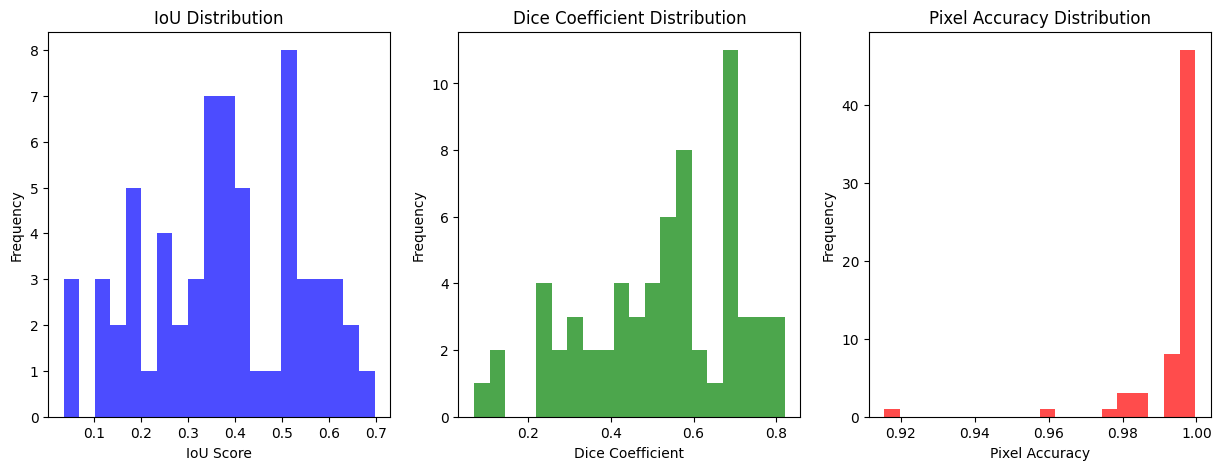

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score, f1_score

def calculate_metrics(y_true, y_pred):
    """
    Calculates IoU, Dice coefficient, and pixel accuracy.
    """
    iou_scores = []
    dice_scores = []
    pixel_accuracies = []
    
    for true, pred in zip(y_true, y_pred):
        # Convert to binary (threshold at 0.5)
        true = (true > 0.5).astype(np.uint8).flatten()
        pred = (pred > 0.5).astype(np.uint8).flatten()
        
        # Compute IoU (Jaccard Index)
        iou = jaccard_score(true, pred, average='binary')
        iou_scores.append(iou)
        
        # Compute Dice Coefficient
        dice = f1_score(true, pred, average='binary')
        dice_scores.append(dice)
        
        # Compute Pixel Accuracy
        pixel_acc = np.mean(true == pred)
        pixel_accuracies.append(pixel_acc)
    
    return np.mean(iou_scores), np.mean(dice_scores), np.mean(pixel_accuracies)

# Ensure binary masks
y_test_bin = (y_test > 0.5).astype(np.uint8)
predicted_masks_bin = (predicted_masks > 0.5).astype(np.uint8)

# Compute metrics for segmentation results
iou, dice, pixel_acc = calculate_metrics(y_test_bin, predicted_masks_bin)

print(f"Mean IoU: {iou:.4f}")
print(f"Mean Dice Coefficient: {dice:.4f}")
print(f"Mean Pixel Accuracy: {pixel_acc:.4f}")

# Visualizing metric distributions
def plot_metric_distributions(y_true, y_pred):
    """
    Plots histograms for IoU, Dice coefficient, and Pixel Accuracy.
    """
    iou_scores = []
    dice_scores = []
    pixel_accuracies = []
    
    for true, pred in zip(y_true, y_pred):
        true = true.flatten()
        pred = pred.flatten()
        
        iou_scores.append(jaccard_score(true, pred, average='binary'))
        dice_scores.append(f1_score(true, pred, average='binary'))
        pixel_accuracies.append(np.mean(true == pred))
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.hist(iou_scores, bins=20, color='blue', alpha=0.7)
    plt.xlabel("IoU Score")
    plt.ylabel("Frequency")
    plt.title("IoU Distribution")
    
    plt.subplot(1, 3, 2)
    plt.hist(dice_scores, bins=20, color='green', alpha=0.7)
    plt.xlabel("Dice Coefficient")
    plt.ylabel("Frequency")
    plt.title("Dice Coefficient Distribution")
    
    plt.subplot(1, 3, 3)
    plt.hist(pixel_accuracies, bins=20, color='red', alpha=0.7)
    plt.xlabel("Pixel Accuracy")
    plt.ylabel("Frequency")
    plt.title("Pixel Accuracy Distribution")
    
    plt.show()

# Plot metric distributions (Pass binary masks)
plot_metric_distributions(y_test_bin, predicted_masks_bin)

In [ ]:


while(True):
    continue
